# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [2]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns

# Create a new dataframe from your CSV
df = pd.read_csv('Rat_Sightings.csv')

In [3]:
# Print out any information you need to understand your dataframe

df.head()

Unique Key            Created Date             Closed Date Agency  \
0    31464015  09/04/2015 12:00:00 AM  09/18/2015 12:00:00 AM  DOHMH   
1    31464024  09/04/2015 12:00:00 AM  10/28/2015 12:00:00 AM  DOHMH   
2    31464025  09/04/2015 12:00:00 AM                     NaN  DOHMH   
3    31464026  09/04/2015 12:00:00 AM  09/14/2015 12:00:00 AM  DOHMH   
4    31464027  09/04/2015 12:00:00 AM  09/22/2015 12:00:00 AM  DOHMH   

                               Agency Name Complaint Type    Descriptor  \
0  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
1  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
2  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
3  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
4  Department of Health and Mental Hygiene         Rodent  Rat Sighting   

                  Location Type  Incident Zip      Incident Address  ...  \
0  3+ Family Mixed Use Building       10006.0                   NaN  ...   
1           Commercial Building       10306.0  2270 HYLAN BOULEVARD  ...   
2           1-2 Family Dwelling       10310.0       758 POST AVENUE  ...   
3       3+ Family Apt. Building       11206.0    198 SCHOLES STREET  ...   
4  3+ Family Mixed Use Building       10462.0   2138 WALLACE AVENUE  ...   

  Bridge Highway Name Bridge Highway Direction Road Ramp  \
0                 NaN                      NaN       NaN   
1                 NaN                      NaN       NaN   
2                 NaN                      NaN       NaN   
3                 NaN                      NaN       NaN   
4                 NaN                      NaN       NaN   

  Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name  \
0                    NaN             NaN             NaN                 NaN   
1                    NaN             NaN             NaN                 NaN   
2                    NaN             NaN             NaN                 NaN   
3                    NaN             NaN             NaN                 NaN   
4                    NaN             NaN             NaN                 NaN   

    Latitude  Longitude                                 Location  
0  40.707772 -74.012963  (40.70777155363643, -74.01296309970473)  
1  40.575209 -74.104547  (40.575209242947444, -74.1045465185469)  
2  40.631236 -74.126878  (40.63123555151668, -74.12687759748677)  
3  40.708987 -73.941207  (40.70898692345805, -73.94120690238431)  
4  40.854130 -73.864813  (40.85413014360452, -73.86481331044513)  

[5 rows x 52 columns]

In [4]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [5]:
df.shape

(101914, 52)

In [6]:
df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                     float64
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<Axes: >

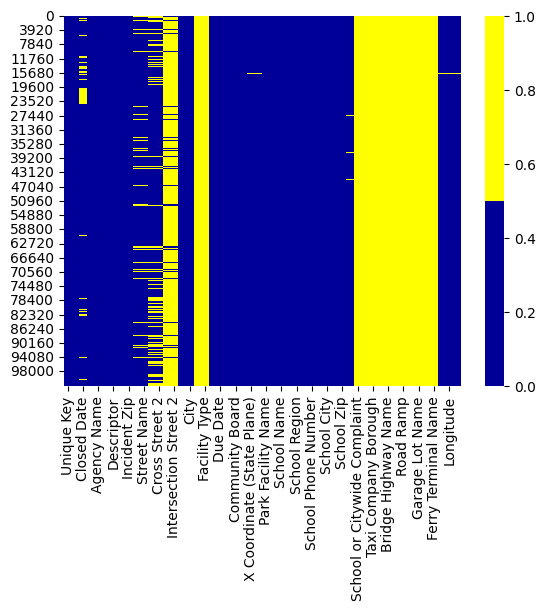

In [7]:
# Plot a heatmap of any missing data
cols = df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
df['Facility Type'].isnull().sum()
#Looks like there are 7 columns with no information. I'll wait until I perform the other two methods before removing them!

101914

In [9]:
# Try out a missing data percentage list! 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
#This was much more informative! Perhaps I'll remove all columns with > 90% missing values.

Unique Key - 0%
Created Date - 0%
Closed Date - 11%
Agency - 0%
Agency Name - 0%
Complaint Type - 0%
Descriptor - 0%
Location Type - 0%
Incident Zip - 0%
Incident Address - 9%
Street Name - 9%
Cross Street 1 - 16%
Cross Street 2 - 16%
Intersection Street 1 - 91%
Intersection Street 2 - 91%
Address Type - 0%
City - 0%
Landmark - 100%
Facility Type - 100%
Status - 0%
Due Date - 0%
Resolution Action Updated Date - 0%
Community Board - 0%
Borough - 0%
X Coordinate (State Plane) - 1%
Y Coordinate (State Plane) - 1%
Park Facility Name - 0%
Park Borough - 0%
School Name - 0%
School Number - 0%
School Region - 0%
School Code - 0%
School Phone Number - 0%
School Address - 0%
School City - 0%
School State - 0%
School Zip - 0%
School Not Found - 1%
School or Citywide Complaint - 100%
Vehicle Type - 100%
Taxi Company Borough - 100%
Taxi Pick Up Location - 100%
Bridge Highway Name - 100%
Bridge Highway Direction - 100%
Road Ramp - 100%
Bridge Highway Segment - 100%
Garage Lot Name - 100%
Ferry Dire

created missing indicator for: Closed Date
created missing indicator for: Location Type
created missing indicator for: Incident Zip
created missing indicator for: Incident Address
created missing indicator for: Street Name
created missing indicator for: Cross Street 1
created missing indicator for: Cross Street 2
created missing indicator for: Intersection Street 1
created missing indicator for: Intersection Street 2
created missing indicator for: Address Type
created missing indicator for: City
created missing indicator for: Landmark
created missing indicator for: Facility Type
created missing indicator for: Due Date
created missing indicator for: Resolution Action Updated Date
created missing indicator for: X Coordinate (State Plane)
created missing indicator for: Y Coordinate (State Plane)
created missing indicator for: School Not Found
created missing indicator for: School or Citywide Complaint
created missing indicator for: Vehicle Type
created missing indicator for: Taxi Company 

<Axes: xlabel='index'>

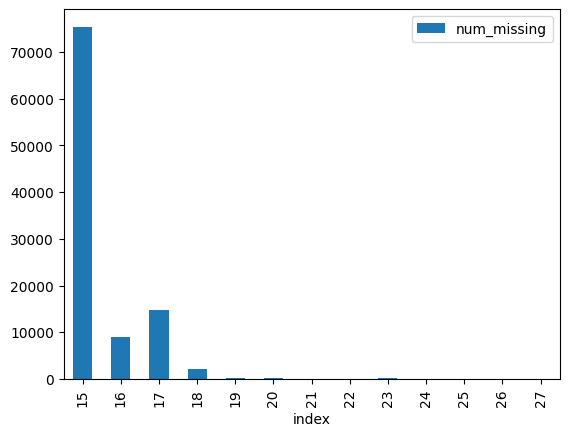

In [10]:
# Plot a missing data histogram
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [11]:
# Handle any missing data in your dataframe.

col_to_drop = []
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if pct_missing > 0.9:
        col_to_drop.append(col)
    if 'ismissing' in col:
        col_to_drop.append(col)
print(col_to_drop)

['Intersection Street 1', 'Intersection Street 2', 'Landmark', 'Facility Type', 'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name', 'Closed Date_ismissing', 'Location Type_ismissing', 'Incident Zip_ismissing', 'Incident Address_ismissing', 'Street Name_ismissing', 'Cross Street 1_ismissing', 'Cross Street 2_ismissing', 'Intersection Street 1_ismissing', 'Intersection Street 2_ismissing', 'Address Type_ismissing', 'City_ismissing', 'Landmark_ismissing', 'Facility Type_ismissing', 'Due Date_ismissing', 'Resolution Action Updated Date_ismissing', 'X Coordinate (State Plane)_ismissing', 'Y Coordinate (State Plane)_ismissing', 'School Not Found_ismissing', 'School or Citywide Complaint_ismissing', 'Vehicle Type_ismissing', 'Taxi Company Borough_ismissing', 'Taxi Pick Up Location_ismissing', 'Bridge

In [12]:
df_less_columns = df.drop(col_to_drop, axis=1)
df_less_columns.shape

(101914, 38)

<Axes: >

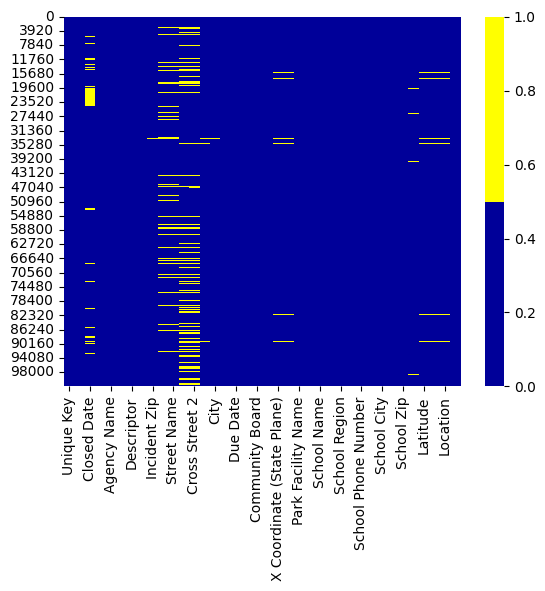

In [13]:
cols = df_less_columns.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df_less_columns[cols].isnull(), cmap=sns.color_palette(colours))

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

In [14]:
print(df_less_columns['Incident Zip'].isnull().sum())

336


In [36]:
ind_missing = df_less_columns[df_less_columns['Incident Zip'].isnull()].index
df_less_missing_rows = df_less_columns.drop(ind_missing, axis=0)

# del_zip = df_less_columns['Incident Zip'].isnull()
# df_less_rows_and_columns = df_less_columns.drop(del_zip, axis=0)
# df_less_rows_and_columns.shape

In [37]:
df_less_missing_rows.shape

(101578, 38)

In [38]:
# Plot a histogram to see if there are any outliers.
#Very few of the features in this dataset are numerical, and the ones that are aren't really indicative of outliers (zipcode, latitude/longitude). Instead I'll look at value_counts.
df_less_missing_rows['Incident Zip'].value_counts().head()

11221.0    3124
11216.0    2494
10025.0    2285
11238.0    2158
11233.0    1925
Name: Incident Zip, dtype: int64

<Axes: >

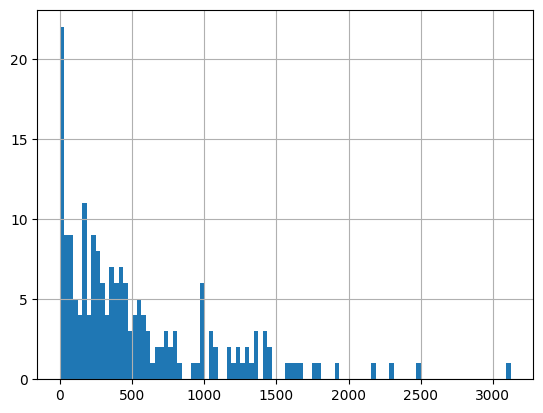

In [39]:
df_less_missing_rows['Incident Zip'].value_counts().hist(bins=100)
#It looks like there's one zip code with significantly more rat sightings than the rest, but I don't believe that's an outlier. Rats are nuts.

<Axes: >

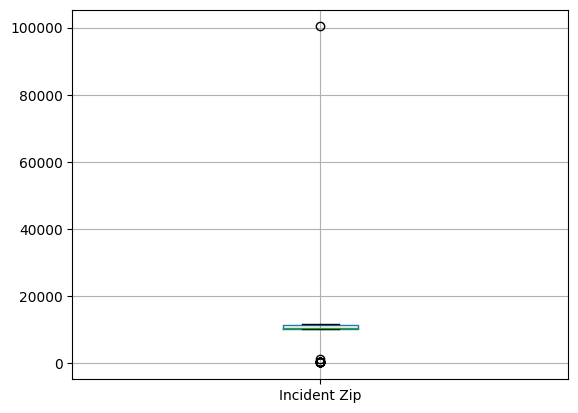

In [40]:
df_less_missing_rows.boxplot(column=['Incident Zip'])

In [41]:
# Use the describe() method
df_less_missing_rows['Incident Zip'].describe()
#Neat! Looks like there's a typo! I don't think 100354 is a real zip code!

count    101578.000000
mean      10728.680895
std         631.206648
min          83.000000
25%       10086.250000
50%       10472.000000
75%       11222.000000
max      100354.000000
Name: Incident Zip, dtype: float64

In [42]:
just_zip = df_less_missing_rows[['Incident Zip']]
just_zip.head()

Incident Zip
0       10006.0
1       10306.0
2       10310.0
3       11206.0
4       10462.0

In [43]:
typo = just_zip.max()
print(typo)
#I'm going to guess that they meant to type 10354. Let's see if there are other rat sightings for that zip.

Incident Zip    100354.0
dtype: float64


<Axes: xlabel='Incident Zip'>

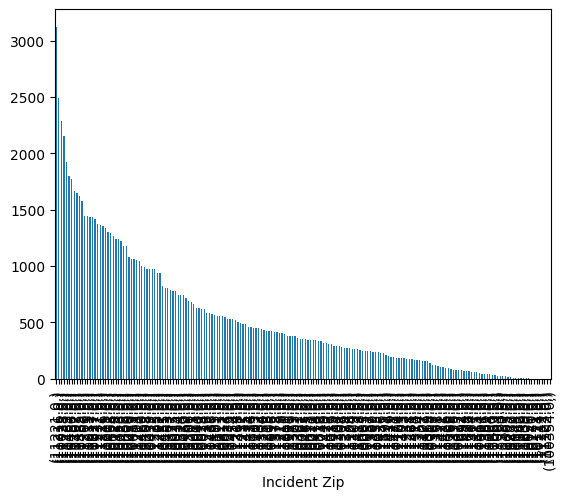

In [44]:
just_zip.value_counts().plot.bar()
#That wasn't as helpful as I thought it would be.

In [45]:
df_less_missing_rows[df_less_missing_rows['Incident Zip'] == 100354]
#Looks like it's just one instance of the outlier.

Unique Key            Created Date Closed Date Agency  \
52591    25169224  03/13/2013 04:01:10 PM         NaN  DOHMH   

                                   Agency Name Complaint Type    Descriptor  \
52591  Department of Health and Mental Hygiene         Rodent  Rat Sighting   

                 Location Type  Incident Zip   Incident Address  ...  \
52591  3+ Family Apt. Building      100354.0  150 ZERMILYEA AVE  ...   

      School Phone Number School Address  School City School State  \
52591         Unspecified    Unspecified  Unspecified  Unspecified   

        School Zip School Not Found Latitude Longitude Location num_missing  
52591  Unspecified                N      NaN       NaN      NaN          24  

[1 rows x 38 columns]

In [46]:
df_less_missing_rows[df_less_missing_rows['Incident Zip'] == 10354]
#I don't see any evidence that any sightings occured in the 10354 zip code. I'll just delete the outlier.

Empty DataFrame
Columns: [Unique Key, Created Date, Closed Date, Agency, Agency Name, Complaint Type, Descriptor, Location Type, Incident Zip, Incident Address, Street Name, Cross Street 1, Cross Street 2, Address Type, City, Status, Due Date, Resolution Action Updated Date, Community Board, Borough, X Coordinate (State Plane), Y Coordinate (State Plane), Park Facility Name, Park Borough, School Name, School Number, School Region, School Code, School Phone Number, School Address, School City, School State, School Zip, School Not Found, Latitude, Longitude, Location, num_missing]
Index: []

[0 rows x 38 columns]

In [47]:
df_less_missing_rows = df_less_missing_rows.drop(52591)

In [48]:
df_less_missing_rows['Incident Zip'].max()

11694.0

<Axes: xlabel='Incident Zip'>

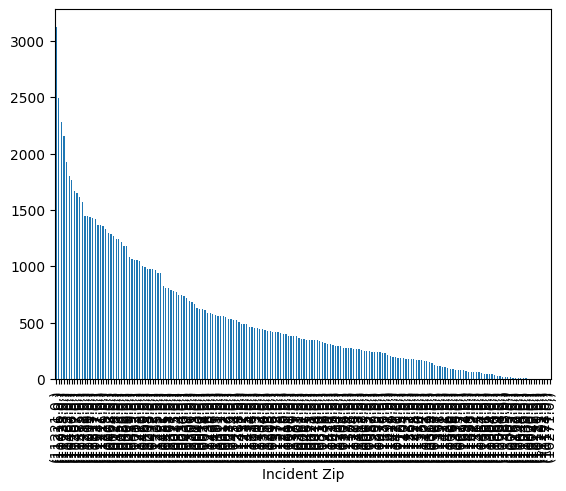

In [49]:
# Plot a bar chart
just_zip = df_less_missing_rows[['Incident Zip']]
just_zip.value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [50]:
# Handle any outliers in your dataframe
#The describe method showed me I had an outlier in my zipcodes, which was a typo. I removed the observation, since it was singular.

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

<Axes: >

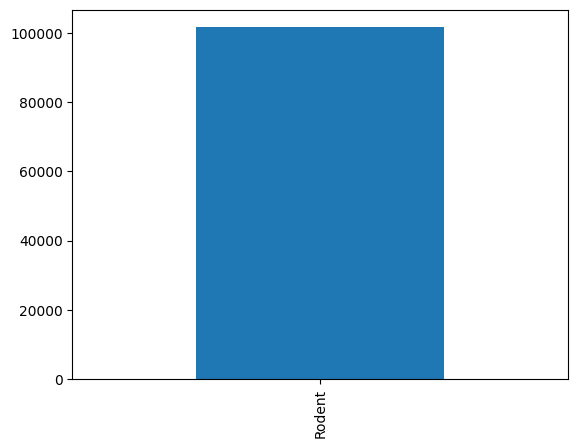

In [58]:
#Check to see if complaint type and descriptor all contain the same values.
#Remove if so.
df_less_missing_rows['Complaint Type'].value_counts().plot.bar()

<Axes: >

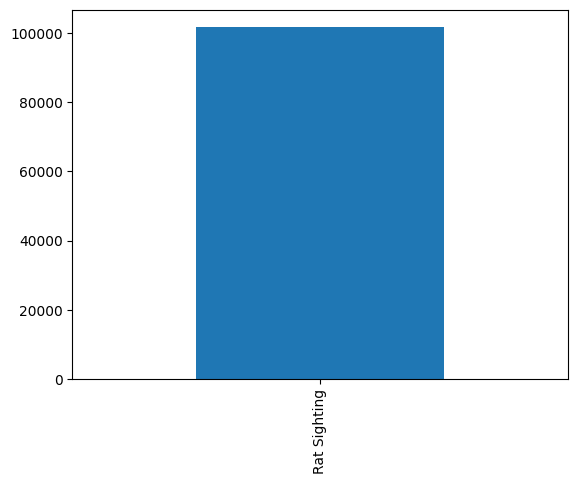

In [59]:
df_less_missing_rows['Descriptor'].value_counts().plot.bar()
#Yep, those columns are unnecessary! Will remove!

In [51]:
df_less_missing_rows.head()

Unique Key            Created Date             Closed Date Agency  \
0    31464015  09/04/2015 12:00:00 AM  09/18/2015 12:00:00 AM  DOHMH   
1    31464024  09/04/2015 12:00:00 AM  10/28/2015 12:00:00 AM  DOHMH   
2    31464025  09/04/2015 12:00:00 AM                     NaN  DOHMH   
3    31464026  09/04/2015 12:00:00 AM  09/14/2015 12:00:00 AM  DOHMH   
4    31464027  09/04/2015 12:00:00 AM  09/22/2015 12:00:00 AM  DOHMH   

                               Agency Name Complaint Type    Descriptor  \
0  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
1  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
2  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
3  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
4  Department of Health and Mental Hygiene         Rodent  Rat Sighting   

                  Location Type  Incident Zip      Incident Address  ...  \
0  3+ Family Mixed Use Building       10006.0                   NaN  ...   
1           Commercial Building       10306.0  2270 HYLAN BOULEVARD  ...   
2           1-2 Family Dwelling       10310.0       758 POST AVENUE  ...   
3       3+ Family Apt. Building       11206.0    198 SCHOLES STREET  ...   
4  3+ Family Mixed Use Building       10462.0   2138 WALLACE AVENUE  ...   

  School Phone Number School Address  School City School State   School Zip  \
0         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
1         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
2         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
3         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   
4         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified   

  School Not Found   Latitude  Longitude  \
0                N  40.707772 -74.012963   
1                N  40.575209 -74.104547   
2                N  40.631236 -74.126878   
3                N  40.708987 -73.941207   
4                N  40.854130 -73.864813   

                                  Location num_missing  
0  (40.70777155363643, -74.01296309970473)          17  
1  (40.575209242947444, -74.1045465185469)          17  
2  (40.63123555151668, -74.12687759748677)          16  
3  (40.70898692345805, -73.94120690238431)          15  
4  (40.85413014360452, -73.86481331044513)          15  

[5 rows x 38 columns]

In [52]:
# Look for any irrelevant data in the dataframe. How will you handle it?
df_less_missing_rows.columns
#My assumption is that we're looking for number of rat sightings per area, by date.
#I think zip code is the best indicator of area for a data set like this.
#Therefore, I think we ought to remove the following columns:
#Closed Date, Agency, Agency Name, Complaint Type, Descriptor, School Phone Number, School Address, School City, School State, School Zip, School Not Found, num_missing

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'Latitude', 'Longitude', 'Location', 'num_missing'],
      dtype='object')

In [60]:
cols_to_drop = ['Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor', 'School Phone Number', 'School Address', 'School City', 'School State', 'School Zip', 'School Not Found', 'num_missing']
df_less_missing_rows = df_less_missing_rows.drop(cols_to_drop, axis=1)

In [61]:
df_less_missing_rows.shape

(101577, 26)

In [77]:
# Look for duplicates. How will you handle any duplicates?
df_minus_dup = df_less_missing_rows.iloc[:,[1,25]].drop_duplicates()
#print(df_less_missing_rows.shape)
print(df_minus_dup.shape)

(98375, 2)


In [78]:
df_minus_dup.head()
#That's not what I wanted. I guess it removed every entry that didn't have a unique value. Whoops! Now to figure out how to delete entries where EVERY value is the same...

Created Date                                 Location
0  09/04/2015 12:00:00 AM  (40.70777155363643, -74.01296309970473)
1  09/04/2015 12:00:00 AM  (40.575209242947444, -74.1045465185469)
2  09/04/2015 12:00:00 AM  (40.63123555151668, -74.12687759748677)
3  09/04/2015 12:00:00 AM  (40.70898692345805, -73.94120690238431)
4  09/04/2015 12:00:00 AM  (40.85413014360452, -73.86481331044513)

In [54]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
#I suppose the 'Complaint Type' and 'Descriptor' data was uninformative (both of those columns just stated that a rat sighting occured).
#I already removed those columns.

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [81]:
# Try to convert all the strings in a column to lower or upper case. 
df_less_missing_rows['Incident Address lower'] = df_less_missing_rows['Incident Address'].str.lower()
print(df_less_missing_rows['Incident Address lower'])

0                          NaN
1         2270 hylan boulevard
2              758 post avenue
3           198 scholes street
4          2138 wallace avenue
                  ...         
101909    2515 atlantic avenue
101910       829 halsey street
101911        98 albany avenue
101912         22-68 46 street
101913       89 lefferts place
Name: Incident Address lower, Length: 101577, dtype: object
